In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
data = pd.read_csv('/home/santosh/temp.csv')
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [26]:
data['Date']=pd.to_datetime(data['Date'], errors='coerce', format='%Y-%m-%d')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [28]:
data.isnull().sum()

Date    0
Temp    0
dtype: int64

In [29]:
data.set_index(['Date'], inplace = True)

In [30]:
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


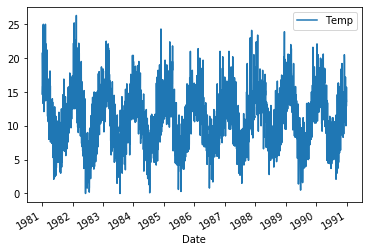

In [31]:
data.plot()

data seems stationary

In [32]:
from statsmodels.tsa.stattools import adfuller
x = data["Temp"]
result = adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -4.44480492461168
p-value 0.0002470826300361191
critical values 16642.822304301197
fail to reject null hypothese h1 , it mean data is stationary


yes we have p values is less that 0.05 s olets continue further
no need to make it stationary lets start with ACF and PACF to finf p and q value

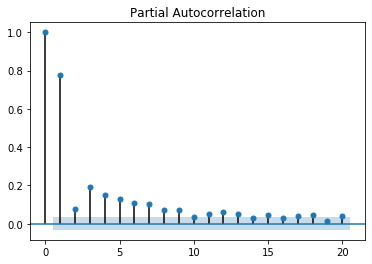

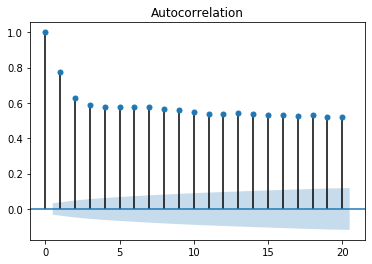

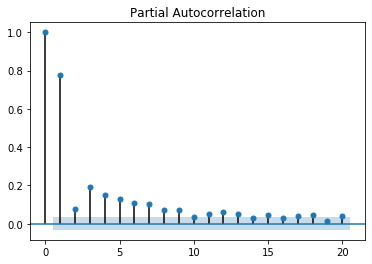

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Temp'].iloc[1:], lags=20)
plot_pacf(data['Temp'].iloc[1:], lags = 20)

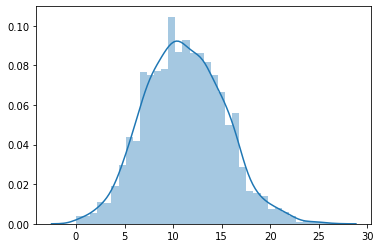

In [39]:
sns.distplot(data)

In [44]:
from statsmodels.tsa.arima_model import ARMA
model=ARMA(data['Temp'],order=(2,2))
model_fit=model.fit()

/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     ARMA(2, 2)   Log Likelihood               -8384.568
Method:                       css-mle   S.D. of innovations              2.406
Date:                Wed, 14 Jul 2021   AIC                          16781.136
Time:                        07:41:59   BIC                          16818.351
Sample:                             0   HQIC                         16794.389
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4839      0.861     13.332      0.000       9.796      13.172
ar.L1.Temp     1.2365      0.038     32.790      0.000       1.163       1.310
ar.L2.Temp    -0.2421      0.037     -6.502      0.000      -0.315      -0.169
ma.L1.Temp    -0.6455      0.037    -17.416      0.000      -0.718      -0.573
ma.L2.Temp    -0.2306      0.030     -7.700      0.000      -0.289      -0.172
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0074           +0.0000j            1.0074            0.0000
AR.2            4.1002           +0.0000j            4.1002            0.0000
MA.1            1.1094           +0.0000j            1.1094            0.0000
MA.2           -3.9090           +0.0000j            3.9090            0.5000
-----------------------------------------------------------------------------
"""

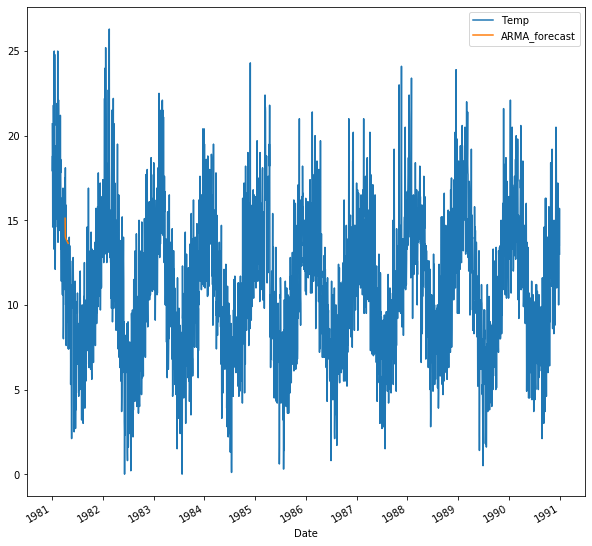

In [48]:
data['ARMA_forecast'] = model_fit.predict(start = 92, end= 114, dynamic= True)  
data[['Temp', 'ARMA_forecast']].plot(figsize=(10, 10))

/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


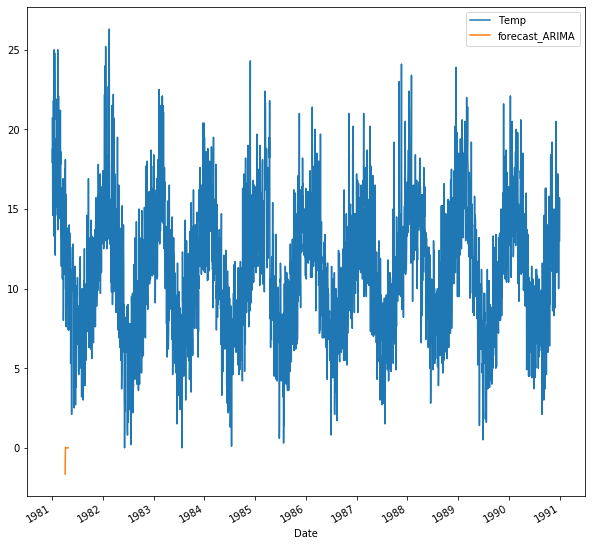

In [50]:
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(data['Temp'],order=(2,1,2))
model_fit1=model1.fit()
data['forecast_ARIMA'] = model_fit1.predict(start = 92, end= 114, dynamic= True)  
data[['Temp', 'forecast_ARIMA']].plot(figsize=(10,10))

In [52]:
data['forcast_SARIMA_1']=result.predict(start=99, end=112, dynamic=True)
data[['Temp','forcast_SARIMA_1']].plot(figsize=(20, 5))

AttributeError: 'tuple' object has no attribute 'predict'